In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline

### Reading in and examining the heart attack cost disparities data

In [3]:
ha_costs_df = pd.read_csv('../data/mmd_heart_attack_data.csv') 
ha_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,40470
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,36615


In [4]:
tn_ha_costs = ha_costs_df.loc[ha_costs_df.state == 'TENNESSEE']
tn_ha_costs.shape

(91, 17)

### Now examining the cancer data

In [5]:
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [6]:
tn_cancer_costs = cancer_costs_df.loc[cancer_costs_df.state == 'TENNESSEE']
tn_cancer_costs.shape

(95, 17)

### Getting the income data and cleaning it a bit

In [7]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


In [8]:
tn_income = income_df.loc[income_df.STATE == 'TN']
tn_income.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510


In [9]:
tn_income.shape

(768, 148)

In [10]:
tn_income = tn_income[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N02300', 'A02300']]

In [11]:
tn_income.columns = ['state', 'county', 'income_bucket', 'return_count', 'single_returns', 'joint_returns', 'head_of_house_returns', 'exemptions', 'dependents', 'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 'returns_with_unemployment', 'unemployment_comp']

### Week two coding tasks
#### Replacing coded values in the `income_bucket` column with descriptive text
- create a dictionary mapping codes to descriptions
- use `replace()` to update the df with text

In [12]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 3: 'Between 10,000 and $25,000',
              4: 'Between 25,000 and $50,000', 5: 'Between 50,000 and $75,000', 
               6: 'Between 75,000 and $100,000', 7: 'Between 100,000 and $200,000', 
               8:'$200,000 or more'}

In [13]:
tn_income.income_bucket = tn_income.income_bucket.replace(income_dict)
tn_income.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


#### Creating a new df that aggregates by county to get the totals for each county

In [14]:
income_county_agg = tn_income.groupby('county').agg('sum').reset_index()
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023


### Week 3 coding tasks

#### Create a barplot to show the total number of returns for each bucket
- first filter to use only the rows where the `county` is **Tennessee**

In [15]:
statewide_tn_income = tn_income.loc[tn_income.county == 'Tennessee']
statewide_tn_income.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,Under $1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,"Between 1 and $10,000",439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132


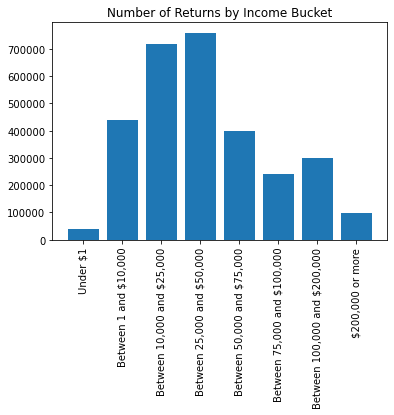

In [16]:
plt.bar('income_bucket', 'return_count', data = statewide_tn_income)
plt.xticks(rotation = 90)
plt.title('Number of Returns by Income Bucket');

#### Create a new column: `avg_income`

In [17]:
income_county_agg['avg_income'] = round(income_county_agg.total_inc_amt * 1000 / income_county_agg.returns_with_total_inc, 0)
income_county_agg.head(3)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41485.0


#### Create a histogram to show distribution of average incomes in the counties

In [18]:
income_county_agg = income_county_agg.loc[income_county_agg.county !='Tennessee']

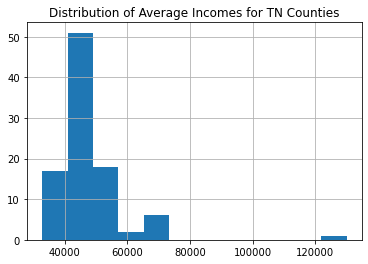

In [19]:
income_county_agg.avg_income.hist(bins = 12)
plt.title('Distribution of Average Incomes for TN Counties');

#### Create boxplots and swarmplots for the `analysis_value` in cancer and heart attack data to compare urban and rural counties

- cancer data

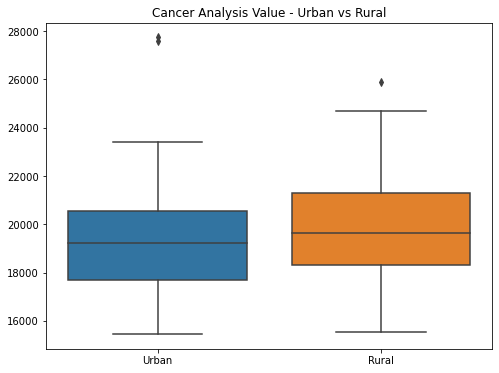

In [20]:
plt.figure(figsize = (8, 6))

sns.boxplot(x = tn_cancer_costs.urban, y = tn_cancer_costs.analysis_value, order=["Urban", "Rural"])
plt.xlabel('')
plt.ylabel('')
plt.title('Cancer Analysis Value - Urban vs Rural');

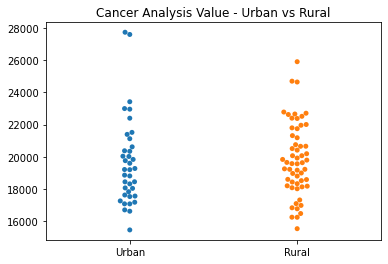

In [21]:
sns.swarmplot(x = tn_cancer_costs.urban, y = tn_cancer_costs.analysis_value, order=["Urban", "Rural"])
plt.xlabel('')
plt.ylabel('')
plt.title('Cancer Analysis Value - Urban vs Rural');

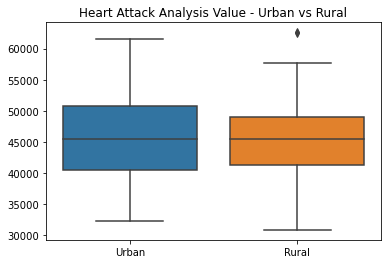

In [22]:
sns.boxplot(x = tn_ha_costs.urban, y = tn_ha_costs.analysis_value, order=["Urban", "Rural"])
plt.xlabel('')
plt.ylabel('')
plt.title('Heart Attack Analysis Value - Urban vs Rural');

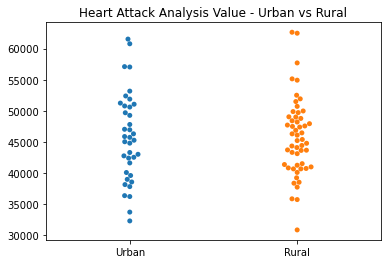

In [23]:
sns.swarmplot(x = tn_ha_costs.urban, y = tn_ha_costs.analysis_value, order=["Urban", "Rural"])
plt.xlabel('')
plt.ylabel('')
plt.title('Heart Attack Analysis Value - Urban vs Rural');

#### Week 4 Coding Tasks
 - rename `analysis_value` columns in `tn_ha_costs` and `tn_cancer_costs`
 

In [24]:
tn_ha_costs.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


In [25]:
tn_ha_costs = tn_ha_costs.rename(columns = {'analysis_value': 'ha_avg_cost'})
tn_ha_costs.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,ha_avg_cost
2030,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,42749
2031,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,Acute myocardial infarction,All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,43661


In [26]:
tn_cancer_costs = tn_cancer_costs.rename(columns = {'analysis_value': 'cancer_avg_cost'})
tn_cancer_costs.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


#### Create a new dataframe  `tn_df` 
- merge `county`, `urban`, and `ha_avg_cost` from `tn_ha_costs` with `county` and `cancer_avg_cost` from `tn_cancer_costs`
- check that `tn_df` contains all counties

In [27]:
tn_cancer_costs.loc[~tn_cancer_costs.county.isin(tn_ha_costs.county)]

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
2429,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47067,Hancock County,TENNESSEE,Rural,All,undefined,22515
2459,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47127,Moore County,TENNESSEE,Rural,All,undefined,16978
2464,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47137,Pickett County,TENNESSEE,Rural,All,undefined,16768
2483,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47175,Van Buren County,TENNESSEE,Rural,All,undefined,16244


##### There is no data for Hancock, Moore, Pickett, and Van Buren counties in the heart attack data

In [28]:
tn_cancer_cost_sub = tn_cancer_costs[['county', 'urban', 'cancer_avg_cost']]
tn_ha_cost_sub = tn_ha_costs[['county', 'ha_avg_cost']]

In [29]:
tn_df = pd.merge(tn_ha_cost_sub, tn_cancer_cost_sub, on = 'county', how = 'inner')
tn_df.head(3)

,county,ha_avg_cost,urban,cancer_avg_cost
0,Anderson County,42749,Urban,15454
1,Bedford County,43661,Rural,19219
2,Benton County,44423,Rural,21315


In [30]:
tn_df.county.nunique()

91

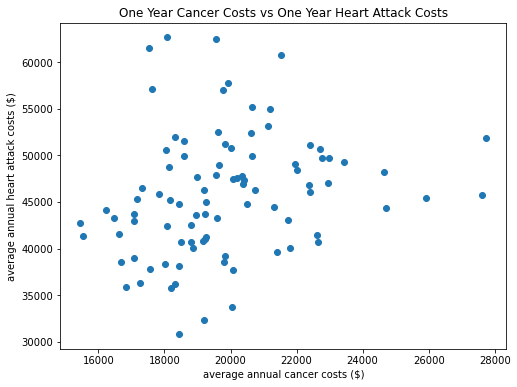

In [31]:
plt.figure(figsize = (8,6))
plt.scatter(tn_df.cancer_avg_cost, tn_df.ha_avg_cost, marker = 'o')
plt.title('One Year Cancer Costs vs One Year Heart Attack Costs')
plt.xlabel('average annual cancer costs ($)')
plt.ylabel('average annual heart attack costs ($)');

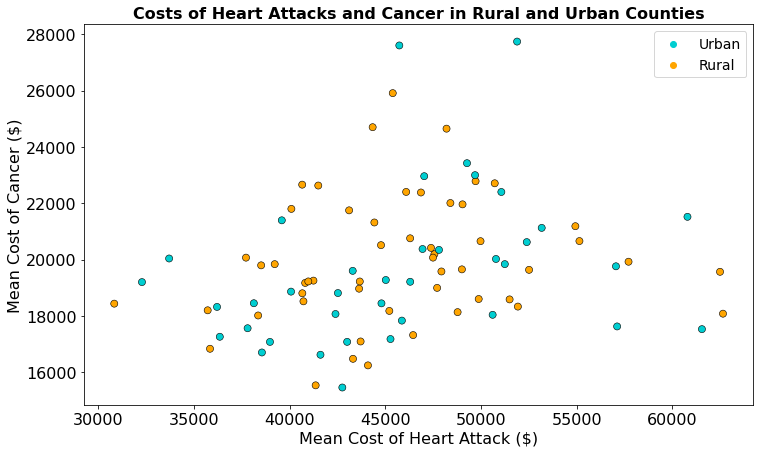

In [32]:
fontsize = 16
plt.figure(figsize = (12,7))
sns.scatterplot(data = tn_df, x = 'ha_avg_cost', y = 'cancer_avg_cost', s = 50,
                hue='urban',
                palette = ['darkturquoise', 'orange'],
                edgecolor = 'black')
plt.xticks(fontsize = fontsize)
plt.xlabel('Mean Cost of Heart Attack ($)', fontsize = fontsize)
plt.yticks(fontsize = fontsize)
plt.ylabel('Mean Cost of Cancer ($)', fontsize = fontsize)
plt.title('Costs of Heart Attacks and Cancer in Rural and Urban Counties', 
          fontsize = fontsize, fontweight = 'bold')
plt.legend(fontsize = fontsize - 2);

- merge `avg_income` from `income_county_agg` with `tn_df` and save back to the `tn_df` variable  

- create `ha_cost_income_ratio` (`ha_avg_cost` / `avg_income`)  

- create `cancer_cost_income_ratio` (`cancer_avg_cost` / `avg_income`)

In [33]:
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53617.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47308.0


In [34]:
income_sub = income_county_agg[['county', 'avg_income']]
tn_df = pd.merge(tn_df, income_sub, on = 'county', how = 'inner')
tn_df.head(2)

,county,ha_avg_cost,urban,cancer_avg_cost,avg_income
0,Anderson County,42749,Urban,15454,53617.0
1,Bedford County,43661,Rural,19219,47308.0


In [35]:
tn_df['ha_cost_income_ratio'] = tn_df.ha_avg_cost / tn_df.avg_income
tn_df['cancer_cost_income_ratio'] = tn_df.cancer_avg_cost / tn_df.avg_income
tn_df.head()

,county,ha_avg_cost,urban,cancer_avg_cost,avg_income,ha_cost_income_ratio,cancer_cost_income_ratio
0,Anderson County,42749,Urban,15454,53617.0,0.797303,0.288229
1,Bedford County,43661,Rural,19219,47308.0,0.922909,0.406253
2,Benton County,44423,Rural,21315,41485.0,1.070821,0.513800
3,Bledsoe County,41240,Rural,19250,39919.0,1.033092,0.482227
4,Blount County,38968,Urban,17073,56978.0,0.683913,0.299642


In [39]:
counties = gpd.read_file('../data/county/tncounty.shp')
counties.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."


In [40]:
counties.shape

(95, 6)

In [38]:
#counties['NAME'] = counties['NAME'].astype('str') + ' County'

#### Before you can merge the `counties` GeoDataFrame with `tn_df` you need to drop the word `County` to get a match
 - one way to do this is using string slicing
 - remember to make sure the counties GeoDataFrame is on the left so that the result is a GeoDataFrame


In [41]:
tn_df['county2'] = tn_df.county.str[:-7]

In [42]:
geo_tn = pd.merge(counties, tn_df, left_on = 'NAME', right_on = 'county2')
geo_tn.head(2)

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,ha_avg_cost,urban,cancer_avg_cost,avg_income,ha_cost_income_ratio,cancer_cost_income_ratio,county2
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester County,49264,Urban,23421,43408.0,1.134906,0.539555,Chester
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,40652,Rural,22658,42781.0,0.950235,0.529628,Wayne


#### Choropleth of `ha_cost_income_ratio`

In [43]:
geo_tn[geo_tn.ha_cost_income_ratio.notnull()].shape

(91, 14)

In [46]:
tn_df_outer=pd.merge(left=tn_cancer_costs[['county','urban','cancer_avg_cost']], 
                     right=tn_ha_costs[['county','ha_avg_cost']], 
                     left_on='county', right_on='county', how='outer')

In [53]:
tn_df_outer = pd.merge(left=income_county_agg[['county','avg_income']], 
                       right=tn_df_outer, left_on = 'county', right_on ='county', how = 'inner')
tn_df_outer

,county,avg_income,avg_income_x,avg_income_y,urban,cancer_avg_cost,ha_avg_cost
0,Anderson County,53617.0,53617.0,53617.0,Urban,15454,42749.0
1,Bedford County,47308.0,47308.0,47308.0,Rural,19219,43661.0
2,Benton County,41485.0,41485.0,41485.0,Rural,21315,44423.0
3,Bledsoe County,39919.0,39919.0,39919.0,Rural,19250,41240.0
4,Blount County,56978.0,56978.0,56978.0,Urban,17073,38968.0
...,...,...,...,...,...,...,...
90,Wayne County,42781.0,42781.0,42781.0,Rural,22658,40652.0
91,Weakley County,44666.0,44666.0,44666.0,Rural,20655,55139.0
92,White County,40443.0,40443.0,40443.0,Rural,18515,40717.0
93,Williamson County,130072.0,130072.0,130072.0,Urban,17527,61541.0


In [54]:
tn_df_outer['ha_cost_income_ratio'] = tn_df_outer.ha_avg_cost / tn_df_outer.avg_income
tn_df_outer['cancer_cost_income_ratio'] = tn_df_outer.cancer_avg_cost / tn_df_outer.avg_income

In [55]:
counties_sort = counties.sort_values(ascending=True, by='NAME')
counties_sort = counties_sort.reset_index()
counties_sort_merge = pd.merge(left=counties_sort, right=tn_df_outer, 
                               left_index=True, right_index=True )

In [56]:
counties_sort_merge.head()

,index,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,avg_income,avg_income_x,avg_income_y,urban,cancer_avg_cost,ha_avg_cost,ha_cost_income_ratio,cancer_cost_income_ratio
0,28,33,Anderson,47001,9.610202e+09,605662.311840,"POLYGON ((2539671.281 623750.657, 2539541.603 ...",Anderson County,53617.0,53617.0,53617.0,Urban,15454,42749.0,0.797303,0.288229
1,64,69,Bedford,47003,1.323640e+10,613112.247144,"POLYGON ((1811870.605 372240.939, 1811745.397 ...",Bedford County,47308.0,47308.0,47308.0,Rural,19219,43661.0,0.922909,0.406253
2,22,27,Benton,47005,1.215877e+10,652794.558148,"POLYGON ((1393612.690 700920.921, 1393607.912 ...",Benton County,41485.0,41485.0,41485.0,Rural,21315,44423.0,1.070821,0.513800
3,60,65,Bledsoe,47007,1.133810e+10,568748.389615,"POLYGON ((2225730.465 410416.106, 2225395.337 ...",Bledsoe County,39919.0,39919.0,39919.0,Rural,19250,41240.0,1.033092,0.482227
4,49,54,Blount,47009,1.579660e+10,734481.262329,"POLYGON ((2621826.470 572956.498, 2622039.552 ...",Blount County,56978.0,56978.0,56978.0,Urban,17073,38968.0,0.683913,0.299642


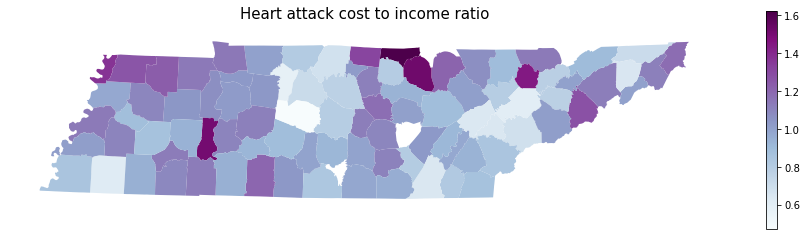

In [60]:
fig, ax = plt.subplots(figsize=(16,4))
counties_sort_merge.plot(column = 'ha_cost_income_ratio', legend = True, cmap = 'BuPu',
              ax = ax)
ax.axis('off')
plt.title ('Heart attack cost to income ratio', fontdict={'fontsize':15}, pad=15);

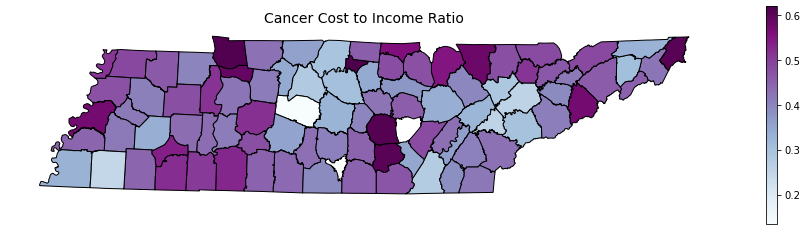

In [61]:
fig, ax = plt.subplots(figsize=(16,4))
geo_tn[geo_tn.cancer_cost_income_ratio.notnull()].plot(column = 'cancer_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio', fontsize = 14)
ax.axis('off');

In [1]:
fig, ax = plt.subplots(figsize=(16,4))
counties_sorted_merge.plot(column = 'ha_cost_income_ratio', ax = ax)
ax.axis('off');
fig, ax = plt.subplots(figsize=(16,4))
counties_sorted_merge.plot(column = 'cancer_cost_income_ratio', ax = ax)
ax.axis('off');

NameError: name 'plt' is not defined

#### Choropleth of `cancer_cost_income_ratio`

In [ ]:
fig, ax = plt.subplots(figsize=(16,4))
geo_tn.plot(column = 'cancer_cost_income_ratio', 
              cmap = 'BuPu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio', fontsize = 14)
ax.axis('off');